In [1]:
import pandas as pd


In [18]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data"
df=pd.read_csv(url)


In [25]:
df.head(3)

,Afghanistan,5,1,648,16,10,2,0,3,5.1,...,0.5,0.6,1.6,0.7,0.8,1.7,0.9,0.10,black,green.1
0,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
1,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
2,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red


**How many rows and columns are in the dataset?**

In [21]:
df.shape

(193, 30)

In [22]:
col_names=['name', 'landmass', 'zone', 'area', 'population', 'language', 'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 'botright']

In [23]:
flags=pd.read_csv(url,names=col_names)

In [24]:
flags.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [27]:
flags.shape

(194, 30)

**What data type is the "stripes" column?**


In [34]:
flags["stripes"].dtype

dtype('int64')

**Are there any missing values?**

In [48]:
flags.isnull().sum()

name          0
landmass      0
zone          0
area          0
population    0
language      0
religion      0
bars          0
stripes       0
colours       0
red           0
green         0
blue          0
gold          0
white         0
black         0
orange        0
mainhue       0
circles       0
crosses       0
saltires      0
quarters      0
sunstars      0
crescent      0
triangle      0
icon          0
animate       0
text          0
topleft       0
botright      0
dtype: int64

**What is the average area of the countries?**

In [42]:
flags["area"].mean()

700.0463917525773

In [51]:
landmass_labels = {

    1: 'N.America',

    2: 'S.America',

    3: 'Europe',

    4: 'Africa',

    5: 'Asia',

    6: 'Oceania'

}

In [52]:
flags['landmass_name'] = flags['landmass'].map(landmass_labels)

In [53]:
flags.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright,landmass_name
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,1,0,0,1,0,0,black,green,Asia
1,Albania,3,1,29,3,6,6,0,0,3,...,0,1,0,0,0,1,0,red,red,Europe
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,1,1,0,0,0,0,green,white,Africa
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,1,1,1,0,blue,red,Oceania
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,blue,red,Europe


What % of flags (countries) are from
Oceania?
Use value_counts) 

In [58]:
(flags["landmass_name"]=="Oceania").sum()/194*100

0.10309278350515463

In [69]:
(flags["landmass_name"].value_counts()/194)*100

Africa       26.804124
Asia         20.103093
Europe       18.041237
N.America    15.979381
Oceania      10.309278
S.America     8.762887
Name: landmass_name, dtype: float64

**Which landmasses have any flags where the mainhue is orange?
Use either groupby() or  pivot ()** 

In [110]:
flags.columns

Index(['name', 'landmass', 'zone', 'area', 'population', 'language',
       'religion', 'bars', 'stripes', 'colours', 'red', 'green', 'blue',
       'gold', 'white', 'black', 'orange', 'mainhue', 'circles', 'crosses',
       'saltires', 'quarters', 'sunstars', 'crescent', 'triangle', 'icon',
       'animate', 'text', 'topleft', 'botright', 'landmass_name'],
      dtype='object')

In [113]:
flags[flags['mainhue'] == 'orange'].groupby('landmass_name').size()


landmass_name
Africa    2
Asia      2
dtype: int64

Alternatively, you could use pivot_table() to create a table where the rows are the landmass names and the columns are the possible values of mainhue. The resulting table would show the count of flags with each mainhue value for each landmass:

In [115]:
flags.pivot_table(index='landmass_name', columns='mainhue', values='name', aggfunc='count', fill_value=0)


mainhue,black,blue,brown,gold,green,orange,red,white
landmass_name,,,,,,,,
Africa,1,6,0,9,17,2,16,1
Asia,1,2,2,2,6,2,20,4
Europe,1,3,0,4,0,0,17,10
N.America,1,15,0,1,5,0,4,5
Oceania,1,11,0,1,1,0,6,0
S.America,0,3,0,2,2,0,8,2


In [114]:
flags[flags['mainhue'] == 'orange'].pivot_table(index='landmass_name', columns='mainhue', values='name', aggfunc='count', fill_value=0)


mainhue,orange
landmass_name,
Africa,2
Asia,2


In [125]:
# Get the aggregated data

landmass_hue_agg = flags.pivot_table(values='name', index='landmass_name', columns='mainhue', aggfunc='count', fill_value=0)

The code creates a pivot table called landmass_hue_agg that aggregates the number of flags for each combination of landmass and main color hue. The table has the number of flags as values, landmass names as index and main hues as columns.

The aggfunc parameter is set to 'count', which means that the function counts the number of occurrences of each combination. The fill_value parameter is set to 0, which means that any missing combinations are filled with zeros.

The second line of code defines a list called ordered_colors that specifies the desired order of the main hues. This can be useful when creating visualizations or when sorting the data.

In [126]:
landmass_hue_agg

mainhue,black,blue,brown,gold,green,orange,red,white
landmass_name,,,,,,,,
Africa,1,6,0,9,17,2,16,1
Asia,1,2,2,2,6,2,20,4
Europe,1,3,0,4,0,0,17,10
N.America,1,15,0,1,5,0,4,5
Oceania,1,11,0,1,1,0,6,0
S.America,0,3,0,2,2,0,8,2


In [127]:
ordered_colors = ['red', 'orange', 'gold', 'green', 

                  'blue', 'black', 'brown', 'white']

In [128]:
landmass_hue_agg = landmass_hue_agg[ordered_colors]

In [129]:
landmass_hue_agg.head()

mainhue,red,orange,gold,green,blue,black,brown,white
landmass_name,,,,,,,,
Africa,16,2,9,17,6,1,0,1
Asia,20,2,2,6,2,1,2,4
Europe,17,0,4,0,3,1,0,10
N.America,4,0,1,5,15,1,0,5
Oceania,6,0,1,1,11,1,0,0


<Axes: title={'center': 'Number of Flags by Landmass and Main Hue'}, xlabel='Landmass', ylabel='Flag count'>

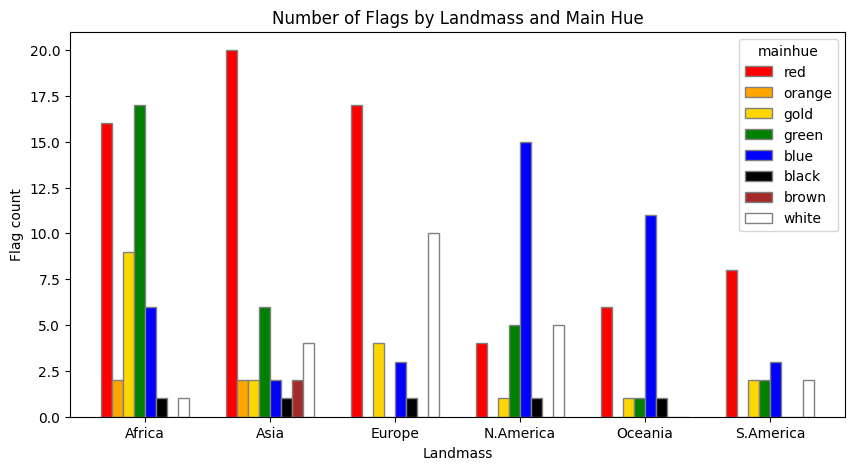

In [130]:
landmass_hue_agg.plot(kind='bar', figsize=(10, 5),  width=.7,

                      color=ordered_colors, edgecolor='grey',

                      title='Number of Flags by Landmass and Main Hue',

                      xlabel='Landmass', ylabel='Flag count',

                      rot=0)